In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score , recall_score , precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import pydotplus

In [3]:
#Load Data
data= pd.read_csv("data.csv",index_col=0)
data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
# view dimensions of dataset
data.shape

(863, 14)

In [5]:
y= data.result
X=data.drop("result",axis=1)

In [6]:
X.columns

Index(['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


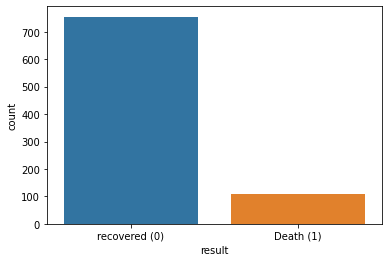

In [7]:
# plot the no of 1's and 0's
g = sns.countplot(data ['result'])
g.set_xticklabels(['recovered (0)', 'Death (1)']) 
plt.show()

In [8]:
# load library
smote = SMOTE()
# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(X, y)
print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 755, 1: 108})
Resampple dataset shape: Counter({1: 755, 0: 755})


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


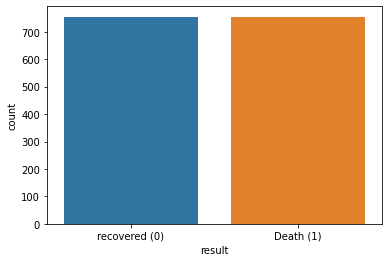

In [9]:
g = sns.countplot(y_smote)
g.set_xticklabels(['recovered (0)', 'Death (1)']) 
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42,shuffle = True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1208, 13)
(302, 13)
(1208,)
(302,)


In [10]:
### (KNN Classifier)

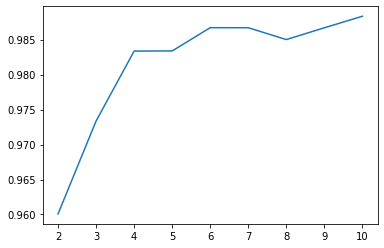

In [11]:
cv_scores_KNN = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(KNeighborsClassifier() , X_train, y_train, cv = i,scoring='recall')
    cv_scores_KNN.append(scores.mean())
    
plt.plot(i_range, cv_scores_KNN)

In [12]:
### (Tuning K in KNN classifier)

In [12]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

param_grid = dict(    
    {
     'n_neighbors' : list(range(1, 31)),
     'weights' : ['uniform','distance'],
     'metric' : ['minkowski','euclidean','manhattan']
    }
)
grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=False,verbose=1)
grid_KNN.fit(X_train, y_train)

print(grid_KNN.best_params_)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [13]:
print(grid_KNN.best_params_)
print(grid_KNN.best_estimator_)
print(grid_KNN.best_score_)

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=1)
0.9759917355371901


In [14]:
#bulding new model with the optimal parameters
knn_clf= KNeighborsClassifier(n_neighbors = 1 , metric = 'manhattan', weights='uniform')
knn_clf.fit(X_train, y_train)
KNN_y_pred = knn_clf.predict(X_test)

In [16]:
### (confusion matrix)

In [15]:
con_matrix = confusion_matrix(y_test , KNN_y_pred)
print(con_matrix)

[[139   9]
 [  3 151]]


In [16]:
print("precision_score : ",precision_score(y_test ,KNN_y_pred))
print("recall_score : " ,recall_score(y_test ,KNN_y_pred))
print("roc_auc_score : ",roc_auc_score(y_test , KNN_y_pred))
print("f1_score : ",f1_score(y_test , KNN_y_pred))
print("accuracy_score : ",accuracy_score(y_test,KNN_y_pred))

KNN_score = ["KNN",accuracy_score(y_test,KNN_y_pred),precision_score(y_test , KNN_y_pred),recall_score(y_test ,KNN_y_pred),\
            f1_score(y_test ,KNN_y_pred),f1_score(y_test , KNN_y_pred)]

precision_score :  0.94375
recall_score :  0.9805194805194806
roc_auc_score :  0.9598543348543349
f1_score :  0.9617834394904459
accuracy_score :  0.9602649006622517


In [19]:
### (ROC curve)

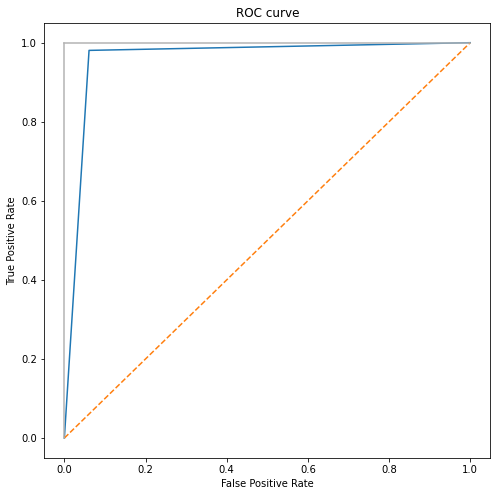

In [17]:
x_test_pred_prob = grid_KNN.predict_proba(X_test)[:,1]

fpr, tpr, thresh = roc_curve(y_test, x_test_pred_prob)
plt.subplots(1, figsize=(8,8))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
### (Visualizing Scores)

<AxesSubplot:>

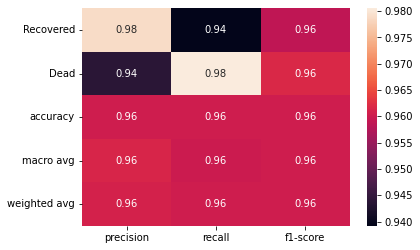

In [18]:
targets = ['Recovered','Dead']
clf_report = classification_report(y_test, KNN_y_pred, target_names=targets,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [23]:
### (Naive bayes Classifier)

In [19]:
data1 = data
data1[data1 < 0] = 0 #replacing negative values with zero
y_naive =data1.result
x_naive=data1.drop("result",axis=1)


In [20]:
naive_clf =  MultinomialNB()
naive_clf.fit(x_naive,y_naive)
naive_y_pred = naive_clf.predict(X_test)

In [26]:
### (Confusion matrix)

In [21]:
con_matrix = confusion_matrix(y_test , naive_y_pred)
print(con_matrix)

[[127  21]
 [ 41 113]]


In [22]:
print("precision_score : ",precision_score(y_test , naive_y_pred))
print("recall_score : " ,recall_score(y_test , naive_y_pred))
print("roc_auc_score : ",roc_auc_score(y_test , naive_y_pred))
print("f1_score : ",f1_score(y_test , naive_y_pred))
print("accuracy_score : ",accuracy_score(y_test,naive_y_pred))

Naive_bayes_score = ["Naive bayes",accuracy_score(y_test,naive_y_pred),precision_score(y_test , naive_y_pred),\
                     recall_score(y_test , naive_y_pred),f1_score(y_test , naive_y_pred),f1_score(y_test , naive_y_pred)]

precision_score :  0.8432835820895522
recall_score :  0.7337662337662337
roc_auc_score :  0.7959371709371709
f1_score :  0.7847222222222222
accuracy_score :  0.7947019867549668


In [29]:

### (ROC curve)

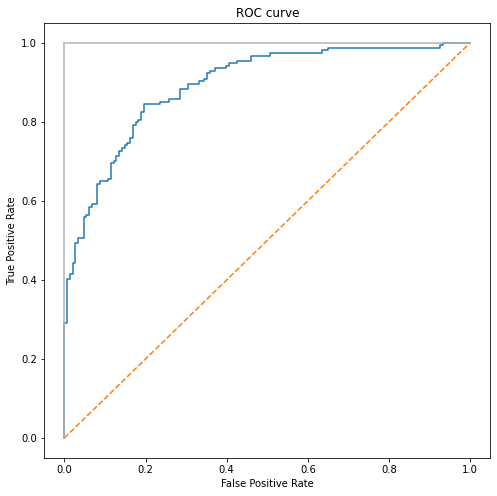

In [23]:
x_test_pred_prob = naive_clf.predict_proba(X_test)[:,1]

fpr, tpr, thresh = roc_curve(y_test, x_test_pred_prob)
plt.subplots(1, figsize=(8,8))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
### (Visualizing Scores)

<AxesSubplot:>

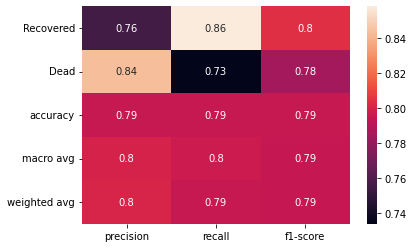

In [24]:
targets = ['Recovered','Dead']
clf_report = classification_report(y_test, naive_y_pred, target_names=targets,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [33]:
### (Decision Tree Classifier)

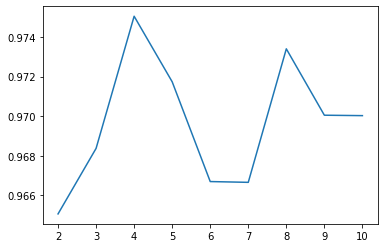

In [25]:
cv_scores_DT = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(DecisionTreeClassifier() , X_train, y_train, cv = i,scoring='recall') 
    cv_scores_DT.append(scores.mean())
    
plt.plot(i_range, cv_scores_DT)

In [35]:
### (Tuning parameters in Decision Tree classifier)

In [26]:
grid_DT = dict(
    {
        'criterion' :['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2'],
        'ccp_alpha': [0.1, .01, .001],
        'max_depth' : [5, 6, 7, 8, 9]
    }
)

grid_Dec_Tree = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=grid_DT, n_jobs=-1, cv= 4 ,\
                             verbose=1,scoring='recall')

grid_Dec_Tree.fit(X_train, y_train)

print(grid_Dec_Tree.best_params_)

Fitting 4 folds for each of 90 candidates, totalling 360 fits
{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}


In [27]:
print(grid_Dec_Tree.best_params_)
print(grid_Dec_Tree.best_estimator_)
print(grid_Dec_Tree.best_score_)

{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}
DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7, max_features='auto',
                       random_state=42)
0.96341059602649


In [28]:
#bulding new model with the optimal parameters
Dec_Tree_clf = DecisionTreeClassifier(ccp_alpha = 0.001, criterion = 'entropy', max_depth = 8, max_features = 'auto',\
                                      random_state = 42)

Dec_Tree_clf.fit(X_train, y_train)
y_pred = Dec_Tree_clf.predict(X_test)

In [39]:
### (Confusion matrix)

In [29]:
con_matrix = confusion_matrix(y_test , y_pred)
print(con_matrix)

[[139   9]
 [  4 150]]


In [30]:
print("precision_score : ",precision_score(y_test , y_pred))
print("recall_score : " ,recall_score(y_test , y_pred))
print("roc_auc_score : ",roc_auc_score(y_test , y_pred))
print("f1_score : ",f1_score(y_test , y_pred))
print("accuracy_score : ",accuracy_score(y_test,y_pred))

Decision_Tree_score = ["Decision Tree",accuracy_score(y_test,y_pred),precision_score(y_test , y_pred),\
                       recall_score(y_test , y_pred),f1_score(y_test , y_pred),f1_score(y_test , y_pred)]

precision_score :  0.9433962264150944
recall_score :  0.974025974025974
roc_auc_score :  0.9566075816075815
f1_score :  0.9584664536741214
accuracy_score :  0.956953642384106


In [42]:
### (ROC curve)

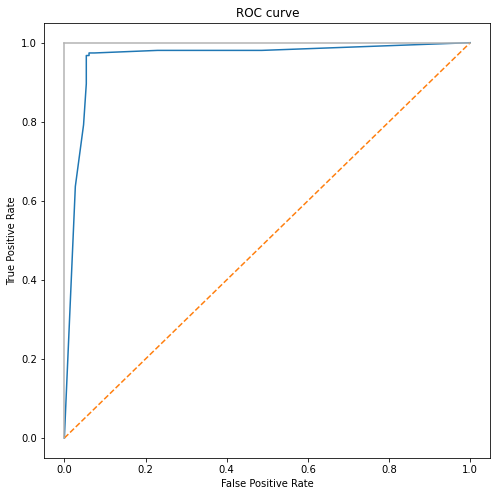

In [31]:
x_test_pred_prob = Dec_Tree_clf.predict_proba(X_test)[:,1]

fpr, tpr, thresh = roc_curve(y_test, x_test_pred_prob)
plt.subplots(1, figsize=(8,8))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
### (Visualizing Scores)

<AxesSubplot:>

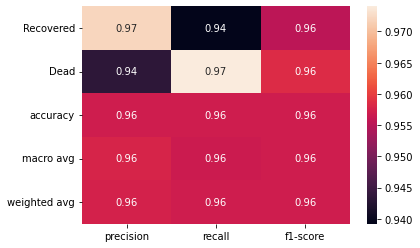

In [32]:
targets = ['Recovered','Dead']
clf_report = classification_report(y_test, y_pred , target_names=targets, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [46]:
### (Visualizing Decision Tree)

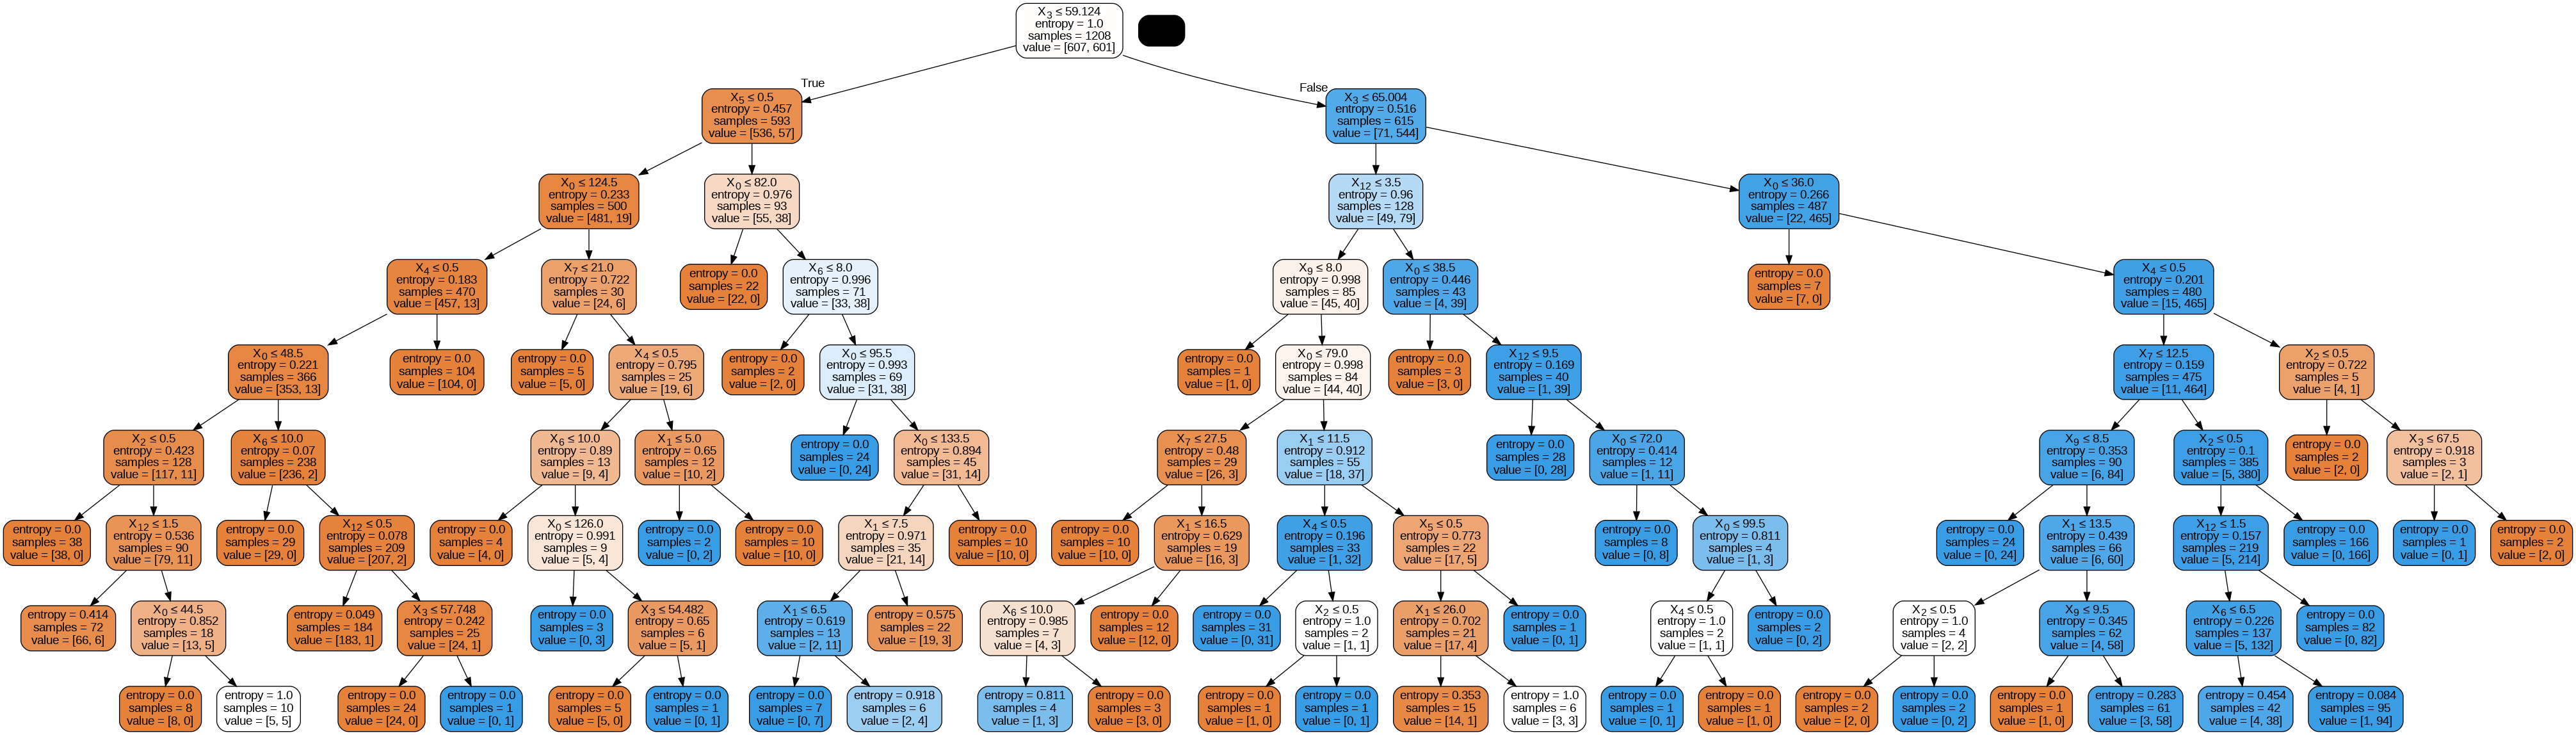

In [33]:
dot_data =StringIO()
export_graphviz(Dec_Tree_clf , out_file = dot_data, rounded =True , filled =True , special_characters =True )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("result.png")
Image(graph.create_png())

In [48]:
### (SVM Classifier)

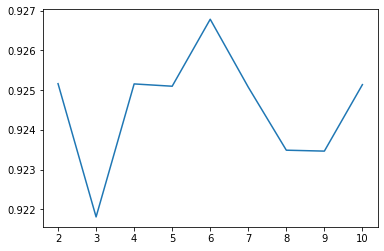

In [34]:
cv_scores_SV = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(SVC() , X_train, y_train, cv = i,scoring='recall')
    cv_scores_SV.append(scores.mean())
    
plt.plot(i_range, cv_scores_SV)

In [50]:
###(Tuning parameters in SVM classifier)

In [35]:
grid_SV = {"C":range(1,10),
            "kernel":["linear", "poly", "rbf", "sigmoid" ],
            "degree":range(3,10),
            "gamma":["scale","auto"]}
svc = SVC(class_weight="balanced")
grid_SVM = GridSearchCV(svc, grid_SV ,return_train_score=True,verbose=1,cv=6)
grid_SVM.fit(X_train,y_train)


Fitting 6 folds for each of 504 candidates, totalling 3024 fits


GridSearchCV(cv=6, estimator=SVC(class_weight='balanced'),
             param_grid={'C': range(1, 10), 'degree': range(3, 10),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=1)

In [36]:
print(grid_SVM.best_params_)
print(grid_SVM.best_estimator_)
print(grid_SVM.best_score_)

{'C': 1, 'degree': 6, 'gamma': 'auto', 'kernel': 'poly'}
SVC(C=1, class_weight='balanced', degree=6, gamma='auto', kernel='poly')
0.9668694481388438


In [37]:
#bulding new model with the optimal parameters
SVM_clf = SVC(C = 1, degree = 3, gamma = 'auto' , kernel = 'poly', class_weight='balanced')

SVM_clf.fit(X_train, y_train)
SVM_y_pred = SVM_clf.predict(X_test)

In [ ]:
### (Confusion matrix)

In [38]:
con_matrix = confusion_matrix(y_test , y_pred)
print(con_matrix)

[[139   9]
 [  4 150]]


In [39]:
print("precision_score : ",precision_score(y_test , y_pred))
print("recall_score : " ,recall_score(y_test , y_pred))
print("roc_auc_score : ",roc_auc_score(y_test , y_pred))
print("f1_score : ",f1_score(y_test , y_pred))
print("accuracy_score : ",accuracy_score(y_test,y_pred))

SVM_score = ["SVM",accuracy_score(y_test,y_pred),precision_score(y_test , y_pred),\
                       recall_score(y_test , y_pred),f1_score(y_test , y_pred),f1_score(y_test , y_pred)]

precision_score :  0.9433962264150944
recall_score :  0.974025974025974
roc_auc_score :  0.9566075816075815
f1_score :  0.9584664536741214
accuracy_score :  0.956953642384106


In [ ]:
### (ROC curve)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


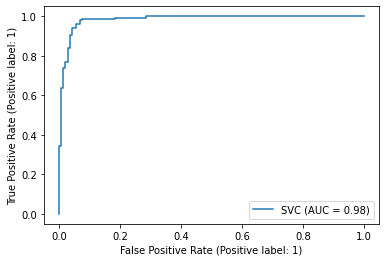

In [40]:
from sklearn import metrics
metrics.plot_roc_curve(SVM_clf, X_test, y_test)
plt.show()

In [ ]:
### (Visualizing Scores)

<AxesSubplot:>

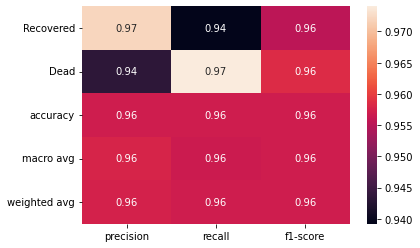

In [41]:
targets = ['Recovered','Dead']
clf_report = classification_report(y_test, y_pred, target_names=targets,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
### (Logistic regression Classifier)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

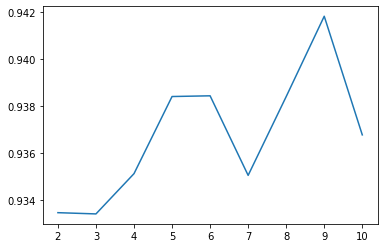

In [42]:
cv_scores_logreg = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(LogisticRegression() , X_train, y_train, cv = i,scoring='recall')
    cv_scores_logreg.append(scores.mean())
plt.plot(i_range, cv_scores_logreg)

In [ ]:
### (Tuning parameters in Logistic regression classifier)

In [ ]:
grid = dict(
    {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
)

grid_LR = GridSearchCV(LogisticRegression(), param_grid=grid, n_jobs=-1, cv=9 ,error_score=0,verbose=1)
grid_LR.fit(X_train, y_train)

print(grid_LR.best_params_)

Fitting 9 folds for each of 1600 candidates, totalling 14400 fits


In [44]:
print(grid_LR.best_params_)
print(grid_LR.best_estimator_)
print(grid_LR.best_score_)

{'C': 78.47599703514607, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=78.47599703514607)
0.923856028499478


In [45]:
#train with the optimal parameters
logistic_clf = LogisticRegression(C=1, solver='newton-cg', class_weight='balanced',random_state=0,max_iter=1000).fit(X_train, y_train)
logistic_y_pred = logistic_clf.predict(X_test)

In [46]:
con_matrix = confusion_matrix(y_test , y_pred)
print(con_matrix)

[[139   9]
 [  4 150]]


In [47]:
print("precision_score : ",precision_score(y_test , y_pred))
print("recall_score : " ,recall_score(y_test , y_pred))
print("roc_auc_score : ",roc_auc_score(y_test , y_pred))
print("f1_score : ",f1_score(y_test , y_pred))
print("accuracy_score : ",accuracy_score(y_test,y_pred))

Logistic_regression_score = ["Logistic regression",accuracy_score(y_test,y_pred),precision_score(y_test , y_pred),\
                       recall_score(y_test , y_pred),f1_score(y_test , y_pred),f1_score(y_test , y_pred)]

precision_score :  0.9433962264150944
recall_score :  0.974025974025974
roc_auc_score :  0.9566075816075815
f1_score :  0.9584664536741214
accuracy_score :  0.956953642384106


In [ ]:
### (ROC curve)

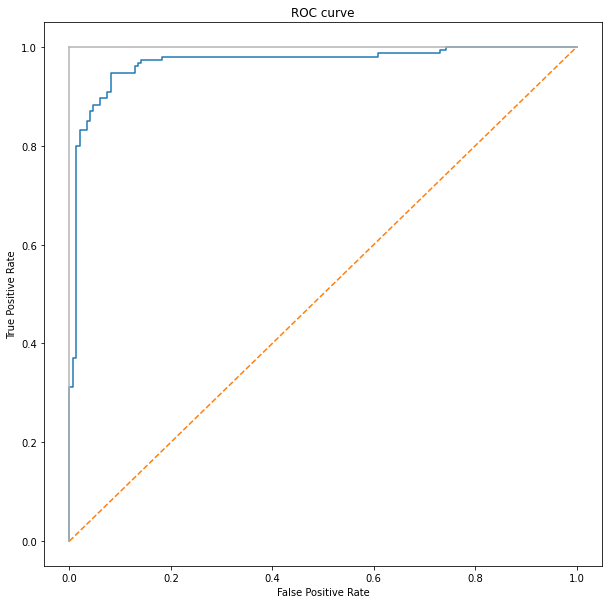

In [48]:
x_test_pred_prob = grid_LR.predict_proba(X_test)[:,1]

fpr, tpr, thresh = roc_curve(y_test, x_test_pred_prob)
plt.subplots(1, figsize=(10,10))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
### (visualizing)

<AxesSubplot:>

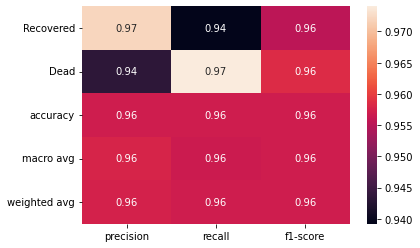

In [49]:
targets = ['Recovered','Dead']
clf_report = classification_report(y_test, y_pred, target_names=targets, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
### (comparsion)

In [50]:
column_names = ["Classifier", "Accuracy", "precision","Recall","F1 score","ROC/AUC"]

Data = [KNN_score , Naive_bayes_score , Decision_Tree_score , Logistic_regression_score , SVM_score]

comparision_df = pd.DataFrame(Data , columns = column_names)

comparision_df

,Classifier,Accuracy,precision,Recall,F1 score,ROC/AUC
0,KNN,0.960265,0.943750,0.980519,0.961783,0.961783
1,Naive bayes,0.794702,0.843284,0.733766,0.784722,0.784722
2,Decision Tree,0.956954,0.943396,0.974026,0.958466,0.958466
3,Logistic regression,0.956954,0.943396,0.974026,0.958466,0.958466
4,SVM,0.956954,0.943396,0.974026,0.958466,0.958466


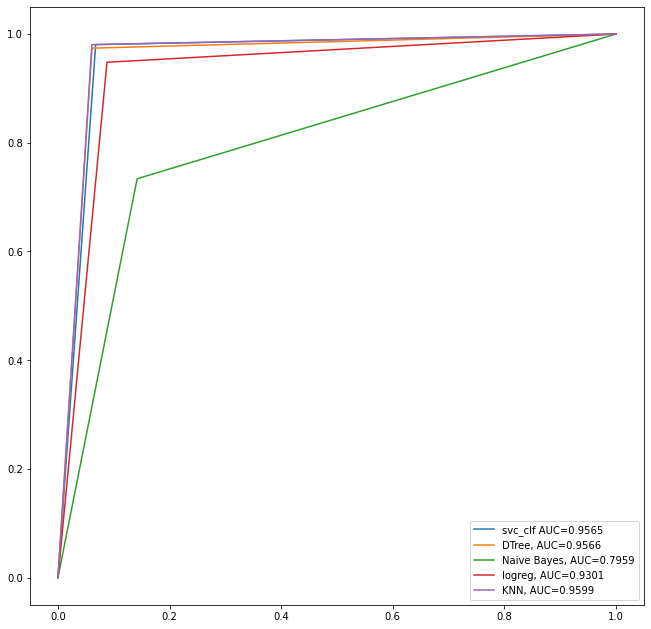

In [51]:
plt.figure (figsize=(11,11))
#for SVM
fpr, tpr, _ = metrics.roc_curve(y_test,SVM_y_pred)
auc = round(metrics.roc_auc_score(y_test, SVM_y_pred), 4)
plt.plot(fpr,tpr,label="svc_clf AUC="+str(auc))
#for Dtree
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="DTree, AUC="+str(auc))
#Naive Bayes
fpr, tpr, _ = metrics.roc_curve(y_test, naive_y_pred)
auc = round(metrics.roc_auc_score(y_test, naive_y_pred), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))
#for logreg
fpr, tpr, _ = metrics.roc_curve(y_test, logistic_y_pred)
auc = round(metrics.roc_auc_score(y_test, logistic_y_pred), 4)
plt.plot(fpr,tpr,label="logreg, AUC="+str(auc))
#for KNN
fpr, tpr, _ = metrics.roc_curve(y_test, KNN_y_pred)
auc = round(metrics.roc_auc_score(y_test, KNN_y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))
plt.legend()